In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
import pickle

with open("testdataprocessed5.pickle", "rb") as data:
    testdataprocessed = pickle.load(data)
    
with open("traindataprocessed4.pickle", "rb") as data:
    traindataprocessed = pickle.load(data)
    
with open("testclasses.pickle", "rb") as data:
    testclasses = pickle.load(data)
    
with open("trainclasses.pickle", "rb") as data:
    trainclasses = pickle.load(data)

In [3]:
def stagger(data, classes, n):
    stagger_data = [
        data[i:i + 2 * n + 1]
        for i in range(0, len(data) - 2 * n,4)
    ]
    
    stagger_classes = classes[n:-n:4]
    
    stagger_data = np.array(stagger_data)
    
    
    return stagger_data, stagger_classes


In [4]:
x = np.array(3 * [range(12)]).transpose()
print(x)
print(stagger(x, range(12), 1))

s_traindata, s_trainclasses = stagger(traindataprocessed, trainclasses, 30)
s_testdata, s_testclasses = stagger(testdataprocessed, testclasses, 30)


[[ 0  0  0]
 [ 1  1  1]
 [ 2  2  2]
 [ 3  3  3]
 [ 4  4  4]
 [ 5  5  5]
 [ 6  6  6]
 [ 7  7  7]
 [ 8  8  8]
 [ 9  9  9]
 [10 10 10]
 [11 11 11]]
(array([[[ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10]]]), range(1, 11, 4))


In [5]:
print (s_traindata.shape)

#model = keras.models.load_model("timesequencemodel")

(42485, 61, 2024)


In [6]:
model = keras.models.Sequential()

In [7]:
model.add(keras.layers.Conv1D(512, 3, activation='relu', input_shape=s_traindata[0].shape))

model.add(keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid'))

model.add(keras.layers.Conv1D(512, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid'))

model.add(keras.layers.Conv1D(512, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid'))
model.add(keras.layers.Flatten())

In [8]:
model.add(keras.layers.Dense(1024, activation='relu'))


In [9]:
model.add(keras.layers.Dense(1, activation='tanh'))

In [10]:
model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.adam(lr=.001))

In [11]:
model.fit(s_traindata, 
          s_trainclasses,
          batch_size=200,
          epochs=30,
          verbose=1,
          validation_data=(s_testdata, s_testclasses))

Train on 42485 samples, validate on 2485 samples
Epoch 1/30
42485/42485 [==============================] - 25s - loss: 0.0489 - val_loss: 0.0674
Epoch 2/30
42485/42485 [==============================] - 22s - loss: 0.0305 - val_loss: 0.0605
Epoch 3/30
42485/42485 [==============================] - 22s - loss: 0.0264 - val_loss: 0.0642
Epoch 4/30
42485/42485 [==============================] - 22s - loss: 0.0239 - val_loss: 0.0587
Epoch 5/30
42485/42485 [==============================] - 22s - loss: 0.0227 - val_loss: 0.0614
Epoch 6/30
42485/42485 [==============================] - 22s - loss: 0.0216 - val_loss: 0.0604
Epoch 7/30
42485/42485 [==============================] - 22s - loss: 0.0197 - val_loss: 0.0597
Epoch 8/30
42485/42485 [==============================] - 22s - loss: 0.0186 - val_loss: 0.0603
Epoch 9/30
42485/42485 [==============================] - 22s - loss: 0.0176 - val_loss: 0.0611
Epoch 10/30
42485/42485 [==============================] - 23s - loss: 0.0173 - val_los

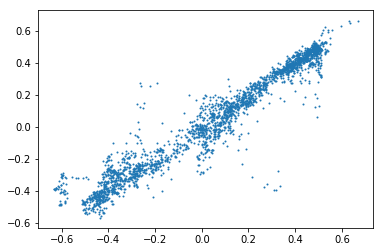

In [13]:
"""import matplotlib.pyplot as plt
plt.scatter(s_trainclasses[:20000].flatten() , model.predict(s_traindata[:20000]).flatten(), 1)
#plt.plot([-1, 1], [-1, 1])
plt.show()"""

import matplotlib.pyplot as plt
plt.scatter(s_testclasses[:].flatten() , model.predict(s_testdata[:]).flatten(), 1)
#plt.plot([-1, 1], [-1, 1])
plt.show()

In [70]:
s_traindata[0].shape

(10752,)

In [75]:
plt.plot(s_traindata[0])

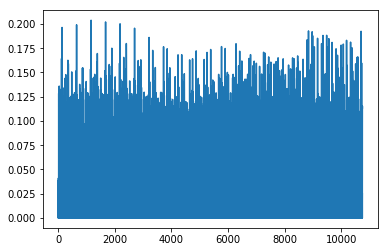

In [76]:
plt.show()

In [24]:
import matplotlib.pyplot as plt
length = 1000
offset = 5000
truth, = plt.plot(s_testclasses[offset:offset + length] * 180 / np.pi)
predicted, = plt.plot(scipy.signal.medfilt(model.predict(s_testdata[offset:offset + length]).flatten() * 180 / np.pi, 35))
plt.ylabel("Angle between Probe and Spine in degrees")
plt.xlabel("Time Step")
plt.legend((truth, predicted), ("Ground Truth", "Network Output"))
plt.show()

NameError: name 'scipy' is not defined

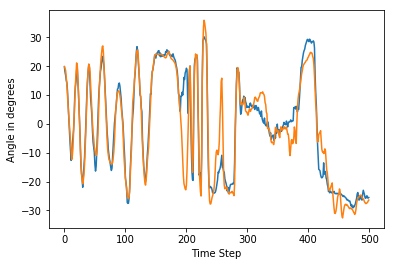

In [15]:
import matplotlib.pyplot as plt
length = 500
offset = 1500
plt.plot(s_testclasses[offset:offset + length] * 180 / np.pi)
plt.plot(model.predict(s_testdata[offset:offset + length]).flatten() * 180 / np.pi)
plt.ylabel("Angle in degrees")
plt.xlabel("Time Step")
plt.show()

In [14]:

length = 1000
offset = 3000
plt.plot(s_trainclasses[offset:offset + length])
plt.plot(model.predict(s_traindata[offset:offset + length]).flatten())
plt.show()

NameError: name 'plt' is not defined

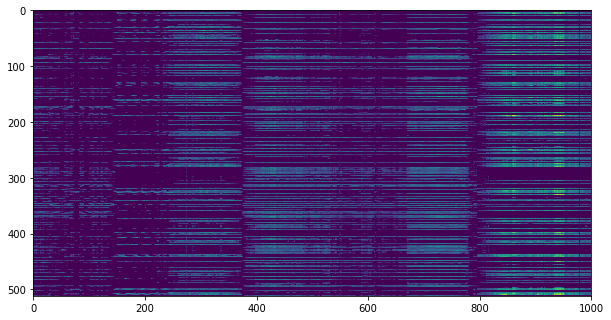

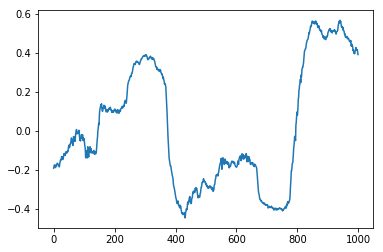

In [30]:
plt.imshow(traindataprocessed[1000:2000].transpose())
plt.show()
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.plot(trainclasses[1000:2000])
plt.plot(model.predict())
plt.show()

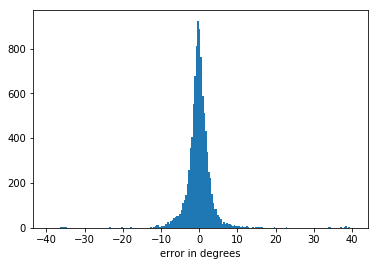

In [14]:
out = model.predict(s_testdata).flatten()

error = ( s_testclasses- out ) * 180 / np.pi
plt.hist(( s_testclasses- model.predict(s_testdata).flatten()) * 180 / np.pi, 200)
plt.xlabel("error in degrees")
plt.show()

In [35]:
proc = keras.models.load_model("dataProcessor")

In [52]:
for layer in proc.layers:
    print(layer.name)

conv2d_6
max_pooling2d_4
conv2d_7
max_pooling2d_5
conv2d_8
max_pooling2d_6
conv2d_9
conv2d_10
flatten_2
dense_4
dropout_3
dense_5
dropout_4


In [51]:
#keras.models.save_model(model, "timesequencemodel")

In [10]:
np.percentile(np.abs(error), 95)

6.5199067241825617

In [11]:
np.std(error)

3.8918856002060411

In [12]:
np.mean(np.abs(error))

2.1418968871459412

In [24]:
import scipy.signal
error2 = ( s_testclasses- scipy.signal.medfilt(out, 35) ) * 180 / np.pi
print(np.percentile(np.abs(error2), 95))
print(np.std(error2))
print(np.mean(np.abs(error2)))

NameError: name 'out' is not defined